In [1]:
import numpy as np
import pdb
# np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=110)

In [2]:
# Movies : 열1) Legally Blond, 열2) Matrix, Bourne Identity, 열3) You've got Mail,
#          열4) The devil wears Prada, 열5) The Dark Knight, 열6) The lord of Rings

In [2]:
P = [[0,0,-1,0,-1,1,1], # User1
     [-1,1,1,-1,0,1,1], # User2
     [0,1,1,0,0,-1,1],  # User3
     [-1,1,1,0,0,1,1],  # User4
     [0,1,1,0,0,1,1],   # User5
     [1,-1,1,1,1,-1,0], # User6
     [-1,1,-1,0,-1,0,1],# User7
     [0,-1,0,1,1,-1,-1], # User8
     [0,0,-1,1,1,0,-1]]  # User9

In [3]:
P = np.array(P)

In [4]:
print("Raw Preference Matrix")
P

Raw Preference Matrix


array([[ 0,  0, -1,  0, -1,  1,  1],
       [-1,  1,  1, -1,  0,  1,  1],
       [ 0,  1,  1,  0,  0, -1,  1],
       [-1,  1,  1,  0,  0,  1,  1],
       [ 0,  1,  1,  0,  0,  1,  1],
       [ 1, -1,  1,  1,  1, -1,  0],
       [-1,  1, -1,  0, -1,  0,  1],
       [ 0, -1,  0,  1,  1, -1, -1],
       [ 0,  0, -1,  1,  1,  0, -1]])

In [5]:
# Parameters
reg = 0.1      # regularization parameter
f   = 2        # number of factors
m, n = P.shape

In [6]:
# Random Initialization
# X is (m * f)
# Y is (f * n)

X = 1 - 2 * np.random.rand(m, f)
Y = 1 - 2 * np.random.rand(f, n)
print(X,'\n')
print(Y)

[[-0.26867159  0.35335817]
 [ 0.86340194  0.23054809]
 [ 0.1079805  -0.10417935]
 [ 0.66665727  0.94497067]
 [ 0.690072   -0.55634415]
 [ 0.34520756  0.68527018]
 [-0.93904615 -0.09790627]
 [ 0.53168409  0.06571763]
 [ 0.65008382  0.28968667]] 

[[-0.30719145  0.99893628  0.73057625 -0.36215764  0.83462082 -0.15862652  0.02227834]
 [ 0.5068475   0.47808695 -0.93975922  0.91434781 -0.24445668 -0.86176039  0.36477346]]


In [7]:
X *= 0.1
Y *= 0.1

print(X.shape,'\n')
print(Y.shape)

(9, 2) 

(2, 7)


In [8]:
np.dot(Y, Y.T)

array([[ 0.02479391, -0.00755029],
       [-0.00755029,  0.03140091]])

In [9]:
np.dot(Y, P.T)

array([[-0.17015453,  0.22625134,  0.19104174,  0.19003558,  0.15931643,  0.00555382, -0.0236791 ,
        -0.03901249, -0.02803914],
       [ 0.0687229 , -0.23798545,  0.07648616, -0.14655067, -0.09586592,  0.06206528,  0.15202288,
         0.06887911,  0.12448769]])

In [10]:
# Alternating Ridge Regression
for _ in range(100):
    # Least Squares keeping Y fixeed
    X = np.linalg.solve(
            np.dot(Y, Y.T) + reg * np.eye(f),
            np.dot(Y, P.T)
        ).T
    # Least Squares keeping X fixed
    Y = np.linalg.solve(
            np.dot(X.T, X) + reg * np.eye(f),
            np.dot(X.T, P)
        )

In [11]:
np.dot(X, Y)

array([[-0.47047922,  0.42881378, -0.92322636, -0.40431679, -0.82818502,  0.71377109,  0.35042355],
       [-0.57771767,  1.11906249,  0.94589735, -0.61386087, -0.4129353 ,  0.72761655,  1.24992392],
       [-0.0832936 ,  0.47515118,  1.23776811, -0.15067564,  0.26037068,  0.02607179,  0.61430711],
       [-0.47973348,  0.9761586 ,  0.95005963, -0.51903742, -0.29509235,  0.59242775,  1.10280113],
       [-0.37594047,  0.8372033 ,  0.99806127, -0.42105323, -0.15760152,  0.44610432,  0.96413779],
       [ 0.67254837, -0.68837772,  1.05514815,  0.59290552,  1.10703254, -1.00139405, -0.60521757],
       [-0.5669041 ,  0.63195598, -0.70791856, -0.51001607, -0.88042533,  0.83110435,  0.58167975],
       [ 0.6594171 , -0.96038669,  0.03268784,  0.63788188,  0.79442154, -0.91013259, -0.98826848],
       [ 0.32613674, -0.67760373, -0.69495433,  0.35562694,  0.18635783, -0.39923687, -0.76905886]])

In [74]:
C = np.abs(P) # Will be 0 only when P[i,j] == 0.
print(C,"\n------------")
for u,Cu in enumerate(C):
    print(u)
    print(Cu)
for u,Cu in enumerate(C.T):
    print(u)
    print(Cu)

[[0 0 1 0 1 1 1]
 [1 1 1 1 0 1 1]
 [0 1 1 0 0 1 1]
 [1 1 1 0 0 1 1]
 [0 1 1 0 0 1 1]
 [1 1 1 1 1 1 0]
 [1 1 1 0 1 0 1]
 [0 1 0 1 1 1 1]
 [0 0 1 1 1 0 1]] 
------------
0
[0 0 1 0 1 1 1]
1
[1 1 1 1 0 1 1]
2
[0 1 1 0 0 1 1]
3
[1 1 1 0 0 1 1]
4
[0 1 1 0 0 1 1]
5
[1 1 1 1 1 1 0]
6
[1 1 1 0 1 0 1]
7
[0 1 0 1 1 1 1]
8
[0 0 1 1 1 0 1]
0
[0 1 0 1 0 1 1 0 0]
1
[0 1 1 1 1 1 1 1 0]
2
[1 1 1 1 1 1 1 0 1]
3
[0 1 0 0 0 1 0 1 1]
4
[1 0 0 0 0 1 1 1 1]
5
[1 1 1 1 1 1 0 1 0]
6
[1 1 1 1 1 0 1 1 1]


In [76]:
# Alternating Weighted Ridge Regression
C = np.abs(P) # Will be 0 only when P[i,j] == 0.
print(C)
for _ in range(100):
    # Solve for X keeping Y fixed
    # Each user u has a different set of weights Cu
    for u,Cu in enumerate(C):
        X[u] = np.linalg.solve(
            np.dot(Y * Cu, Y.T) + reg * np.eye(f),
            np.dot(Y * Cu, P[u])
        )
    # Solve for X keeping Y fixed
    for i,Ci in enumerate(C.T):
        Y[:,i] = np.linalg.solve(
            np.dot(X.T * Ci, X) + reg * np.eye(f),
            np.dot(X.T * Ci, P[:,i].T)
        )
print("Alternating Weighted Ridge Regression:")
print(np.dot(X,Y))

[[0 0 1 0 1 1 1]
 [1 1 1 1 0 1 1]
 [0 1 1 0 0 1 1]
 [1 1 1 0 0 1 1]
 [0 1 1 0 0 1 1]
 [1 1 1 1 1 1 0]
 [1 1 1 0 1 0 1]
 [0 1 0 1 1 1 1]
 [0 0 1 1 1 0 1]]
Alternating Weighted Ridge Regression:
[[-0.87859027  0.75590724 -0.84723563 -0.90527055 -0.91301333  1.22456438  0.77033672]
 [-0.96652404  1.12037446  0.83860293 -1.0062598  -1.00816781  0.7238245   1.10749966]
 [-0.32540028  0.55731429  1.38658512 -0.34525484 -0.34177508 -0.14502952  0.5350508 ]
 [-0.96804132  1.12193599  0.83870998 -1.00783237 -1.00974789  0.72538652  1.10906061]
 [-0.95828449  1.11192636  0.83821625 -0.99772117 -0.99958767  0.71527345  1.09905152]
 [ 0.92243212 -0.80264821  0.8342072   0.95076812  0.95869082 -1.26620165 -0.81689977]
 [-1.02703832  0.89416382 -0.92578475 -1.05860544 -1.06741531  1.4087278   0.90998244]
 [ 0.95136697 -0.98077092 -0.07729381  0.98609147  0.99076241 -0.97584085 -0.9802453 ]
 [ 0.89692815 -1.06911002 -0.95852135  0.9348602   0.93595776 -0.60823401 -1.05423484]]


In [85]:
R_hat = pd.DataFrame(np.dot(X, Y))
P_raw = pd.DataFrame(P)
for k2 in range(9): 
    print("User : ", k2, "________")
    print(P_raw.loc[k2,:].to_numpy())
    predictions = R_hat.loc[k2,P_raw.loc[k2,:] == 0] # Predictions for movies that the user 3 hasn't rated yet
    print(predictions.to_numpy())

User :  0 ________
[ 0  0 -1  0 -1  1  1]
[-0.87859027  0.75590724 -0.90527055]
User :  1 ________
[-1  1  1 -1  0  1  1]
[-1.00816781]
User :  2 ________
[ 0  1  1  0  0 -1  1]
[-0.32540028 -0.34525484 -0.34177508]
User :  3 ________
[-1  1  1  0  0  1  1]
[-1.00783237 -1.00974789]
User :  4 ________
[0 1 1 0 0 1 1]
[-0.95828449 -0.99772117 -0.99958767]
User :  5 ________
[ 1 -1  1  1  1 -1  0]
[-0.81689977]
User :  6 ________
[-1  1 -1  0 -1  0  1]
[-1.05860544  1.4087278 ]
User :  7 ________
[ 0 -1  0  1  1 -1 -1]
[ 0.95136697 -0.07729381]
User :  8 ________
[ 0  0 -1  1  1  0 -1]
[ 0.89692815 -1.06911002 -0.60823401]


In [80]:
top5 = predictions.sort_values(ascending=False).head(n=5)
recommendations = pd.DataFrame(data=top5)
recommendations.columns = ['Predicted Rating']

recommendations

,Predicted Rating
3,-1.007832
4,-1.009748


In [71]:
# k = len(A) #number of users
# n = len(A[0]) #number of movies
# # Construct the Preference matrix P
# # Construct the Confidence matrix C
# self.P = np.zeros((k,n))
# C = np.zeros((k,n))
# for u in range(k): # users
#     for m in range(n): # movies
#         if A[u][m]>thres : 
#             self.P[u][m] = 1
#         else : 
#             self.P[u][m] = 0

#         C[u][m] = 1 + self.alpha*A[u][m]
# # print("P and C built")
# # Construct the C^u matrices and the  C^m matrices
# Cu = []
# Cm = []    
# for u in range(k):
#     Cu.append(np.diag(C[u]))

# for m in range(n):
#     Cm.append(np.diag(C[:,m]))
# #print("Cu and Cm built")

# # Initialize X
# self.X = np.random.rand(k,self.f)
# Xprev = self.X+2*self.epsilon*np.ones((k,self.f))

# # Initialize Y
# self.Y = np.random.rand(self.f,n)
# Yprev = self.Y+2*self.epsilon*np.ones((self.f,n))

# while max(np.linalg.norm(self.X-Xprev) , np.linalg.norm(self.Y-Yprev) ) > self.epsilon:
#     Xprev = self.X
#     Yprev = self.Y
#     for u in range(k): # users
#         self.X[u] = np.transpose(np.dot( np.linalg.inv(np.dot(np.dot( self.Y , Cu[u]) , np.transpose(self.Y) ) + 
#                                                        self.lambd*np.identity(self.f)) , 
#                                          np.dot(np.dot(self.Y, Cu[u]),self.P[u] )
#                                        )
#                                 )

#     for m in range(n): # movies
#         self.Y[:,m] = np.dot( np.linalg.inv(np.dot(np.dot( np.transpose(self.X) , Cm[m]) , self.X ) + 
#                                             self.lambd*np.identity(self.f)) , 
#                              np.dot(np.dot(np.transpose(self.X), Cm[m]),self.P[:,m] ))
# #print("fitting done")

In [36]:
import numpy as np
import pandas as pd
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('./ml-100k/u.data', sep='\t', names=header)
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [89]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [90]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.25)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Create training and test matrix
R = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]  

T = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]

In [41]:
pd.DataFrame(R).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,0.0,0.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
pd.DataFrame(T).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [92]:
# Calculate the RMSE
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - np.dot(P.T,Q)))**2)/len(R[R > 0]))

In [93]:
lmbda = 0.1 # Regularisation weight
k = 20 # Dimensionality of latent feature space
m, n = R.shape # Number of users and items
n_epochs = 15 # Number of epochs


print(m)
print(n)

943
1682


In [94]:
P = 3 * np.random.rand(k,m) # Latent user feature matrix
print(P.shape)
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix
print(Q.shape)
Q[0,:] = R[R != 0].mean(axis=0) # Avg. rating for each movie

E = np.eye(k) # (k x k)-dimensional idendity matrix
print(E.shape)

(20, 943)
(20, 1682)
(20, 20)


In [48]:
%%time
train_errors = []
test_errors = []

# Repeat until convergence
for epoch in range(n_epochs):
    # Fix Q and estimate P
    for i, Ii in enumerate(I):
        nui = np.count_nonzero(Ii) # Number of items user i has rated
        if (nui == 0): nui = 1 # Be aware of zero counts!
    
        # Least squares solution
        Ai = np.dot(Q, np.dot(np.diag(Ii), Q.T)) + lmbda * nui * E
        Vi = np.dot(Q, np.dot(np.diag(Ii), R[i].T))
        P[:,i] = np.linalg.solve(Ai,Vi)
        
    # Fix P and estimate Q
    for j, Ij in enumerate(I.T):
        nmj = np.count_nonzero(Ij) # Number of users that rated item j
        if (nmj == 0): nmj = 1 # Be aware of zero counts!
        
        # Least squares solution
        Aj = np.dot(P, np.dot(np.diag(Ij), P.T)) + lmbda * nmj * E
        Vj = np.dot(P, np.dot(np.diag(Ij), R[:,j]))
        Q[:,j] = np.linalg.solve(Aj,Vj)
    
    train_rmse = rmse(I,R,Q,P)
    test_rmse = rmse(I2,T,Q,P)
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    
    print("[Epoch %d/%d] train error: %f, test error: %f" \
    %(epoch+1, n_epochs, train_rmse, test_rmse))
    
print("Algorithm converged")

[Epoch 1/15] train error: 1.153271, test error: 1.262307
[Epoch 2/15] train error: 0.868478, test error: 1.047993
[Epoch 3/15] train error: 0.784339, test error: 1.006421
[Epoch 4/15] train error: 0.743285, test error: 0.984352
[Epoch 5/15] train error: 0.720081, test error: 0.970893
[Epoch 6/15] train error: 0.705311, test error: 0.962047
[Epoch 7/15] train error: 0.695122, test error: 0.955940
[Epoch 8/15] train error: 0.687736, test error: 0.951545
[Epoch 9/15] train error: 0.682202, test error: 0.948272
[Epoch 10/15] train error: 0.677952, test error: 0.945773
[Epoch 11/15] train error: 0.674614, test error: 0.943828
[Epoch 12/15] train error: 0.671941, test error: 0.942297
[Epoch 13/15] train error: 0.669763, test error: 0.941078
[Epoch 14/15] train error: 0.667963, test error: 0.940100
[Epoch 15/15] train error: 0.666458, test error: 0.939311
Algorithm converged
CPU times: total: 17min 51s
Wall time: 9min


In [95]:
# First, re-initialize P and Q
P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix
Q[0,:] = R[R != 0].mean(axis=0) # Avg. rating for each movie

In [96]:
%%time

# Uset different train and test errors arrays so I can plot both versions later
train_errors_fast = []
test_errors_fast = []

# Repeat until convergence
for epoch in range(n_epochs):
    # Fix Q and estimate P
    for i, Ii in enumerate(I):
        nui = np.count_nonzero(Ii) # Number of items user i has rated
        if (nui == 0): nui = 1 # Be aware of zero counts!
    
        # Least squares solution
        
        # Replaced lines
        #-----------------------------------------------------------
        # Ai = np.dot(Q, np.dot(np.diag(Ii), Q.T)) + lmbda * nui * E
        # Vi = np.dot(Q, np.dot(np.diag(Ii), R[i].T))
        #-----------------------------------------------------------
        
        # Added Lines
        #-------------------------------------------------------------------
        # Get array of nonzero indices in row Ii
        Ii_nonzero = np.nonzero(Ii)[0]
        # Select subset of Q associated with movies reviewed by user i
        Q_Ii = Q[:, Ii_nonzero]
        # Select subset of row R_i associated with movies reviewed by user i
        R_Ii = R[i, Ii_nonzero]
        Ai = np.dot(Q_Ii, Q_Ii.T) + lmbda * nui * E
        Vi = np.dot(Q_Ii, R_Ii.T)
        #-------------------------------------------------------------------
        
        P[:, i] = np.linalg.solve(Ai, Vi)
        
    # Fix P and estimate Q
    for j, Ij in enumerate(I.T):
        nmj = np.count_nonzero(Ij) # Number of users that rated item j
        if (nmj == 0): nmj = 1 # Be aware of zero counts!
        
        # Least squares solution
        
        # Removed Lines
        #-----------------------------------------------------------
        # Aj = np.dot(P, np.dot(np.diag(Ij), P.T)) + lmbda * nmj * E
        # Vj = np.dot(P, np.dot(np.diag(Ij), R[:,j]))
        #-----------------------------------------------------------
        
        # Added Lines
        #-----------------------------------------------------------------------
        # Get array of nonzero indices in row Ij
        Ij_nonzero = np.nonzero(Ij)[0]
        # Select subset of P associated with users who reviewed movie j
        P_Ij = P[:, Ij_nonzero]
        # Select subset of column R_j associated with users who reviewed movie j
        R_Ij = R[Ij_nonzero, j]
        Aj = np.dot(P_Ij, P_Ij.T) + lmbda * nmj * E
        Vj = np.dot(P_Ij, R_Ij)
        #-----------------------------------------------------------------------
        
        Q[:,j] = np.linalg.solve(Aj,Vj)
    
    train_rmse = rmse(I,R,Q,P)
    test_rmse = rmse(I2,T,Q,P)
    train_errors_fast.append(train_rmse)
    test_errors_fast.append(test_rmse)
    
    print("[Epoch %d/%d] train error: %f, test error: %f" \
    %(epoch+1, n_epochs, train_rmse, test_rmse))
    
print("Algorithm converged")

[Epoch 1/15] train error: 1.190670, test error: 1.303712
[Epoch 2/15] train error: 0.878771, test error: 1.065977
[Epoch 3/15] train error: 0.789260, test error: 1.019963
[Epoch 4/15] train error: 0.746796, test error: 0.995962
[Epoch 5/15] train error: 0.722197, test error: 0.980294
[Epoch 6/15] train error: 0.706422, test error: 0.969426
[Epoch 7/15] train error: 0.695599, test error: 0.961728
[Epoch 8/15] train error: 0.687797, test error: 0.956208
[Epoch 9/15] train error: 0.681956, test error: 0.952209
[Epoch 10/15] train error: 0.677457, test error: 0.949277
[Epoch 11/15] train error: 0.673914, test error: 0.947090
[Epoch 12/15] train error: 0.671075, test error: 0.945428
[Epoch 13/15] train error: 0.668769, test error: 0.944139
[Epoch 14/15] train error: 0.666876, test error: 0.943120
[Epoch 15/15] train error: 0.665305, test error: 0.942302
Algorithm converged
CPU times: total: 10.3 s
Wall time: 5.34 s


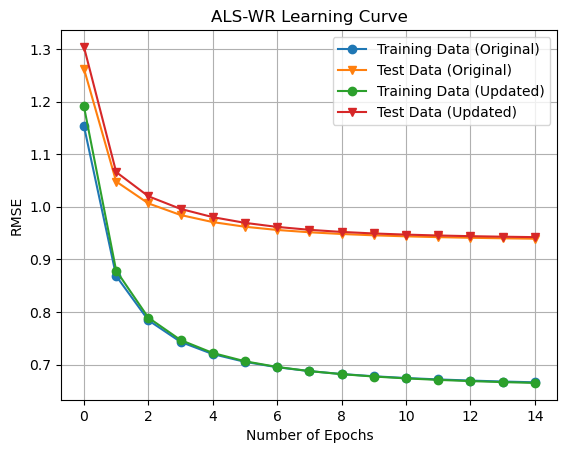

In [97]:
# Check performance by plotting train and test errors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data (Original)');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data (Original)');


# Added curves for errors from updated algorithm to make sure the accuracy is unchanged (aside from random deviations)
plt.plot(range(n_epochs), train_errors_fast, marker='o', label='Training Data (Updated)');
plt.plot(range(n_epochs), test_errors_fast, marker='v', label='Test Data (Updated)');
plt.title('ALS-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [98]:
# Calculate prediction matrix R_hat (low-rank approximation for R)
R_hat = pd.DataFrame(np.dot(P.T,Q))
R = pd.DataFrame(R)

In [99]:
# Compare true ratings of user 17 with predictions
ratings = pd.DataFrame(data=R.loc[16,R.loc[16,:] > 0]).head(n=5)
ratings['Prediction'] = R_hat.loc[16,R.loc[16,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']

ratings

,Actual Rating,Predicted Rating
6,4.0,3.306924
8,3.0,3.301116
12,3.0,3.170192
99,4.0,3.330184
110,3.0,2.829198


In [100]:
predictions = R_hat.loc[16,R.loc[16,:] == 0] # Predictions for movies that the user 17 hasn't rated yet
top5 = predictions.sort_values(ascending=False).head(n=5)
recommendations = pd.DataFrame(data=top5)
recommendations.columns = ['Predicted Rating']

recommendations

,Predicted Rating
172,4.376118
49,4.364195
407,4.176932
171,4.099644
150,4.051969
